# Importing the Libraries


In [204]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor
from sklearn import metrics
from sklearn import linear_model

from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso


## Data Collection & Analysis

In [2]:
# loading the dataset from csv file to a pandas dataframe
#training set
tr_set= pd.read_csv(r"C:\Users\vibgyors computer\OneDrive\Desktop\Project\Technocolabs\Big Mart Sales\Train.csv")
#test set
te_set= pd.read_csv(r"C:\Users\vibgyors computer\OneDrive\Desktop\Project\Technocolabs\Big Mart Sales\Test.csv")


Training Set

In [3]:
tr_set.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Test Set

In [4]:
te_set.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
# no of data pointss and no. of features
tr_set.shape,te_set.shape

((8523, 12), (5681, 11))

In [6]:
tr_set.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
te_set.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


## preprocessing of the dataset

In [8]:
# getting some information about the dataset
tr_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
te_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [10]:
tr_set.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
te_set.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

### Handling missing value

mean = avg value

mode = most repeated value

#### value counts for Outlet_size and Item_Weight

In [12]:
print("Outlet_Size:\n", tr_set.Outlet_Size.value_counts(), "\n\n")
print("Item_Weight:\n", tr_set.Item_Weight.value_counts(), "\n\n")

Outlet_Size:
 Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64 


Item_Weight:
 12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64 




In [13]:
tr_set['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [14]:
tr_set['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

## Replacing the missing values in 'Outlet_Size with mean

In [15]:
# mean value of 'Item_Weight ' column
tr_set['Item_Weight'].mean(), tr_set['Item_Weight'].mean()


(12.857645184135976, 12.857645184135976)

In [16]:
# filling the missing values in 'Item_Weight' column with ' mean' values
tr_set['Item_Weight'].fillna(tr_set['Item_Weight'].mean(),inplace=True)
te_set['Item_Weight'].fillna(te_set['Item_Weight'].mean(),inplace=True)

In [17]:
#checking the missing value in Item_Weight column
tr_set['Item_Weight'].isnull().sum(),te_set['Item_Weight'].isnull().sum()

(0, 0)

##  Replacing the missing values in 'Outlet_Size with mode

Oulet_Size column missing value is filled by taking the mode of Outlet_Type column 

In [18]:
mode_of_outlet_size= tr_set.pivot_table(values="Outlet_Size", columns="Outlet_Type", aggfunc=(lambda x: x.mode()[0]))
miss_values= tr_set['Outlet_Size'].isnull()
tr_set.loc[miss_values, 'Outlet_Size'] = tr_set.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])


In [19]:
mode_of_outlet_size= te_set.pivot_table(values="Outlet_Size", columns="Outlet_Type", aggfunc=(lambda x: x.mode()[0]))
miss_values= te_set['Outlet_Size'].isnull()
te_set.loc[miss_values, 'Outlet_Size'] = te_set.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])


In [20]:
#checking the missing value in Outlet_Size column
tr_set['Outlet_Size'].isnull().sum(),te_set['Outlet_Size'].isnull().sum()

(0, 0)

In [21]:
tr_set.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Data Pre-Processing/Exploration

In [34]:
df1 = tr_set.select_dtypes('number').columns.to_list()
df1


['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [40]:
[tr_set[numeric].value_counts() for numeric in df1[1:]]

[0.000000    526
 0.076975      3
 0.162462      2
 0.076841      2
 0.073562      2
            ... 
 0.013957      1
 0.110460      1
 0.124646      1
 0.054142      1
 0.044878      1
 Name: Item_Visibility, Length: 7880, dtype: int64,
 172.0422    7
 170.5422    6
 196.5084    6
 188.1872    6
 142.0154    6
            ..
 97.3384     1
 83.1934     1
 96.6752     1
 152.6682    1
 75.4670     1
 Name: Item_MRP, Length: 5938, dtype: int64,
 1985    1463
 1987     932
 1999     930
 1997     930
 2004     930
 2002     929
 2009     928
 2007     926
 1998     555
 Name: Outlet_Establishment_Year, dtype: int64,
 958.7520     17
 1342.2528    16
 703.0848     15
 1845.5976    15
 1278.3360    14
              ..
 4124.6310     1
 6622.7126     1
 1614.5650     1
 5602.7070     1
 2778.3834     1
 Name: Item_Outlet_Sales, Length: 3493, dtype: int64]

In [32]:
df = tr_set.select_dtypes('object').columns.to_list()
df

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [31]:
[tr_set[category].value_counts() for category in df[1:]]

[Low Fat    5089
 Regular    2889
 LF          316
 reg         117
 low fat     112
 Name: Item_Fat_Content, dtype: int64,
 Fruits and Vegetables    1232
 Snack Foods              1200
 Household                 910
 Frozen Foods              856
 Dairy                     682
 Canned                    649
 Baking Goods              648
 Health and Hygiene        520
 Soft Drinks               445
 Meat                      425
 Breads                    251
 Hard Drinks               214
 Others                    169
 Starchy Foods             148
 Breakfast                 110
 Seafood                    64
 Name: Item_Type, dtype: int64,
 OUT027    935
 OUT013    932
 OUT049    930
 OUT046    930
 OUT035    930
 OUT045    929
 OUT018    928
 OUT017    926
 OUT010    555
 OUT019    528
 Name: Outlet_Identifier, dtype: int64,
 Small     4798
 Medium    2793
 High       932
 Name: Outlet_Size, dtype: int64,
 Tier 3    3350
 Tier 2    2785
 Tier 1    2388
 Name: Outlet_Location_Type,

In [41]:
tr_set['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Replacing repeated values in Item_Fat_Content using .replace() function

In [44]:
tr_set.replace({'Item_Fat_Content':{"low fat": "Low Fat",'LF':'Low Fat','reg':'Regular'}},inplace=True)
te_set.replace({'Item_Fat_Content':{"low fat": "Low Fat",'LF':'Low Fat','reg':'Regular'}},inplace=True)

In [46]:
tr_set['Item_Fat_Content'].value_counts(),te_set['Item_Fat_Content'].value_counts()

(Low Fat    5517
 Regular    3006
 Name: Item_Fat_Content, dtype: int64,
 Low Fat    3668
 Regular    2013
 Name: Item_Fat_Content, dtype: int64)

In [47]:
tr_set.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Adding new column Outlet_Age by subtracting Outlet_Establishment_Year from 2013, since big_mart_data is taken in 2013.
So the value reduced.

In [52]:
#creating our new column for both datasets
tr_set['Outlet_Age'], te_set['Outlet_Age']= tr_set['Outlet_Establishment_Year'].apply(lambda year: 2013 - year), te_set['Outlet_Establishment_Year'].apply(lambda year: 2013 - year)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,15
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26


In [53]:
tr_set.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,15
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26


## Data Visualization

Univariate Plots

Numerical Features

In [55]:
sns.set()

C:\Users\vibgyors computer\AppData\Local\Temp\ipykernel_20384\1811598889.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tr_set['Item_Weight'])


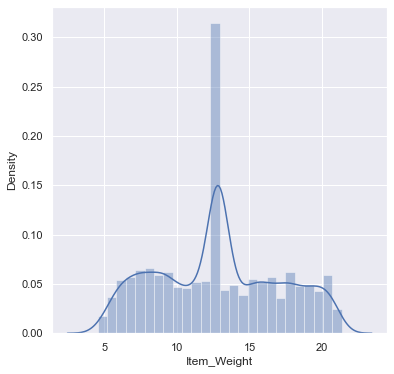

In [56]:
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(tr_set['Item_Weight'])
plt.show()

C:\Users\vibgyors computer\AppData\Local\Temp\ipykernel_20384\3130751683.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tr_set['Item_Visibility'])


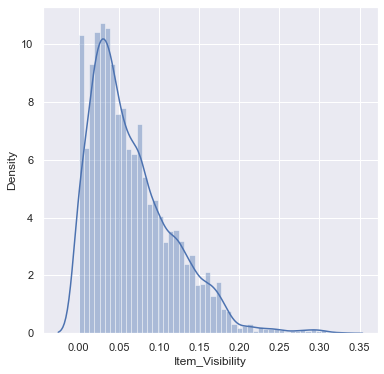

In [58]:
# Item_Visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(tr_set['Item_Visibility'])
plt.show()

C:\Users\vibgyors computer\AppData\Local\Temp\ipykernel_20384\268644858.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tr_set['Item_MRP'])


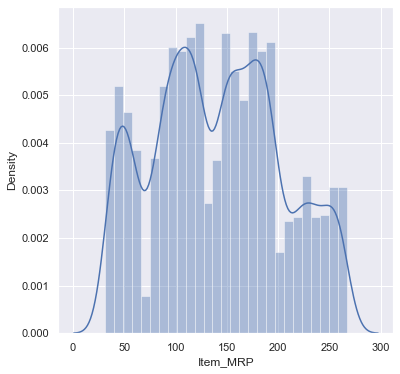

In [59]:
# Item_MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(tr_set['Item_MRP'])
plt.show()

C:\Users\vibgyors computer\AppData\Local\Temp\ipykernel_20384\314177624.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tr_set['Outlet_Establishment_Year'])


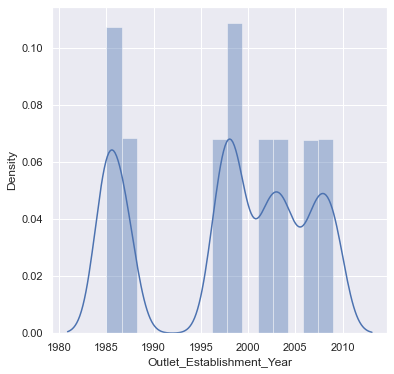

In [60]:
# Outlet_Establishment_Year
plt.figure(figsize=(6,6))
sns.distplot(tr_set['Outlet_Establishment_Year'])
plt.show()

C:\Users\vibgyors computer\AppData\Local\Temp\ipykernel_20384\3291366879.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tr_set['Outlet_Age'])


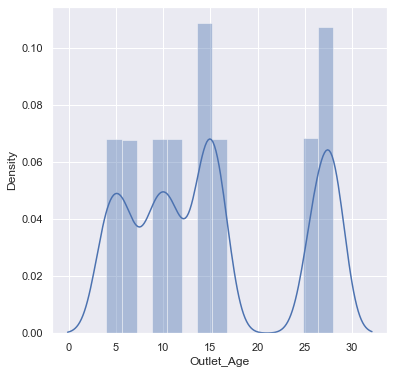

In [61]:
# Outlet_Age
plt.figure(figsize=(6,6))
sns.distplot(tr_set['Outlet_Age'])
plt.show()

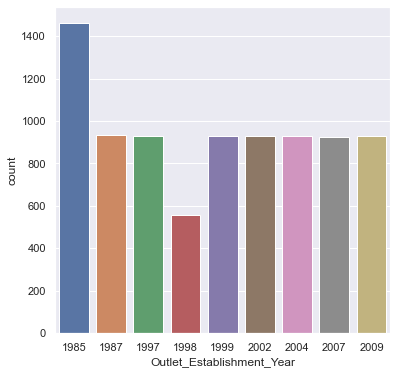

In [63]:
# Outlet_Establishment_Year
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year',data=tr_set)
plt.show()

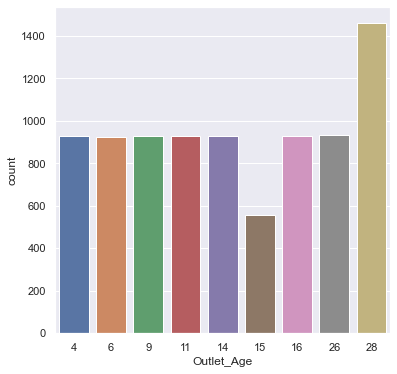

In [64]:
# Outlet_Age
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Age',data=tr_set)
plt.show()

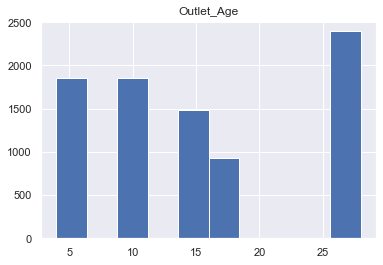

In [66]:
plt.hist(tr_set['Outlet_Age'])
plt.title("Outlet_Age")
plt.show()

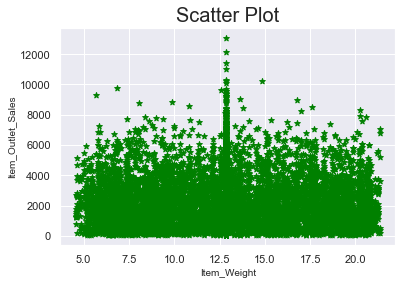

In [149]:
plt.xlabel('Item_Weight', fontsize=10)
plt.ylabel('Item_Outlet_Sales', fontsize=10)
plt.title('Scatter Plot',fontsize=20)
plt.scatter(tr_set.Item_Weight,tr_set.Item_Outlet_Sales,color= 'green',marker='*')


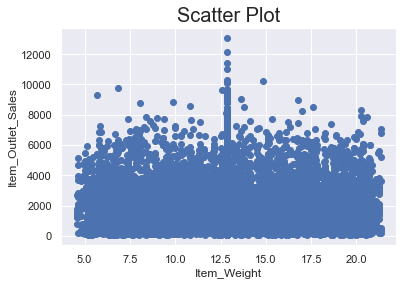

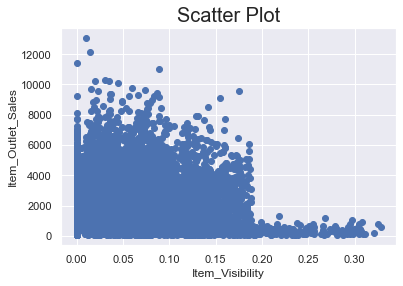

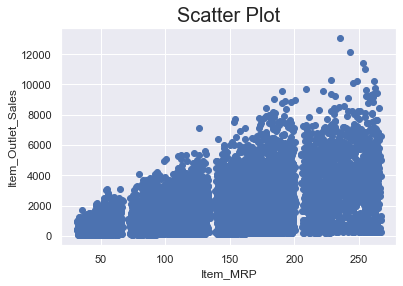

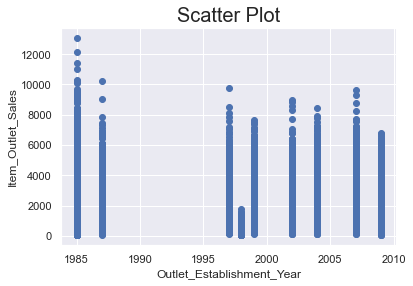

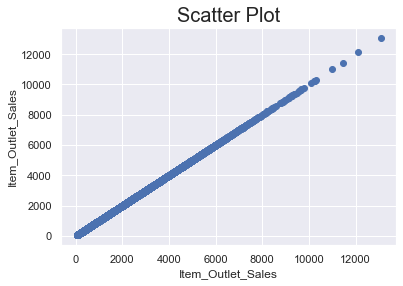

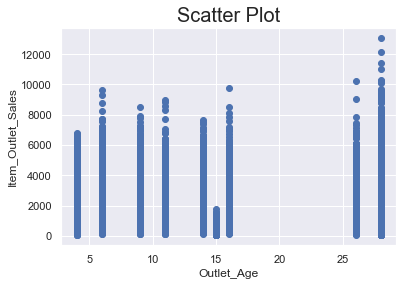

In [110]:
num = tr_set.select_dtypes('number').columns.to_list()
BM_num =tr_set[num]
for numeric in BM_num[num[:7]]:
    plt.scatter(BM_num[numeric], BM_num['Item_Outlet_Sales'])
    plt.title("Scatter Plot", fontsize=20) 
    plt.xlabel(numeric)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()


## Univariate Conclusion

Item_Weight- No outliers in the data so we choose mean for filling the null value.

Outlet_Age - most common outlet is 35 years old.

Item_MRP- Strongly positive relation with Item_Outlet_sales. Sales is incresing with the MRP

# Multivariate plots

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


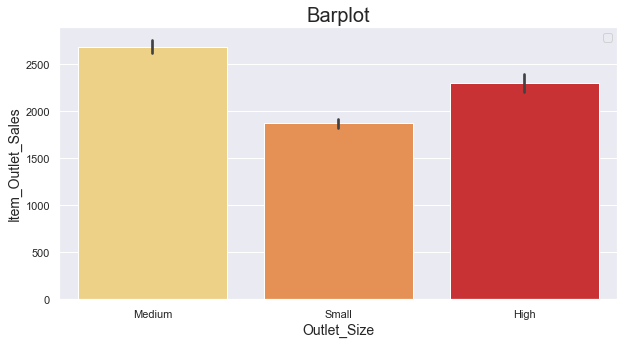

In [164]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Size' ,y='Item_Outlet_Sales', data=tr_set ,palette='YlOrRd')
plt.xlabel('Outlet_Size', fontsize=14)
plt.ylabel('Item_Outlet_Sales',fontsize=14)
plt.legend()
plt.title('Barplot', fontsize=20)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


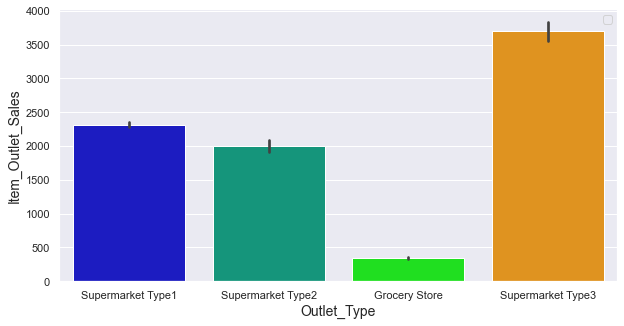

In [168]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Type' ,y='Item_Outlet_Sales', data=tr_set,palette='nipy_spectral')
plt.xlabel('Outlet_Type', fontsize=14)
plt.ylabel('Item_Outlet_Sales',fontsize=14)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


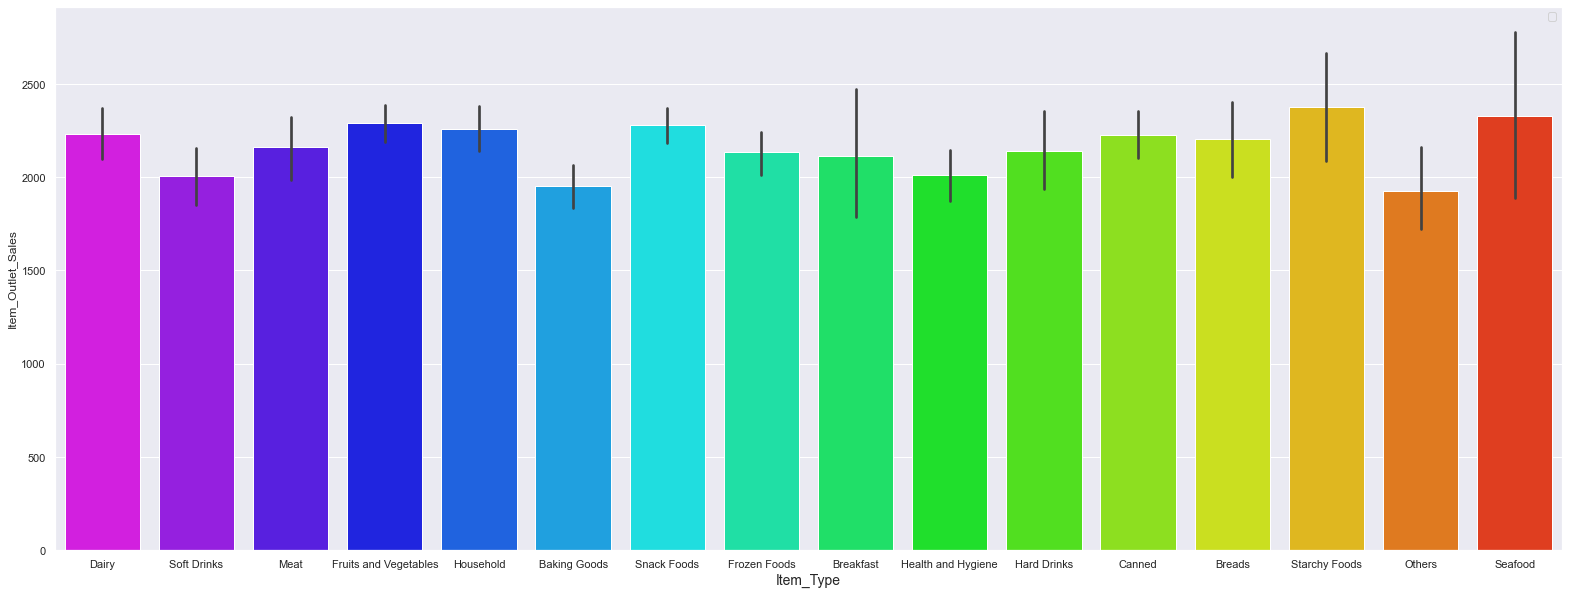

In [165]:
plt.figure(figsize=(27,10))
sns.barplot(x='Item_Type' ,y='Item_Outlet_Sales', data=tr_set ,palette='gist_rainbow_r')
plt.xlabel('Item_Type', fontsize=14)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


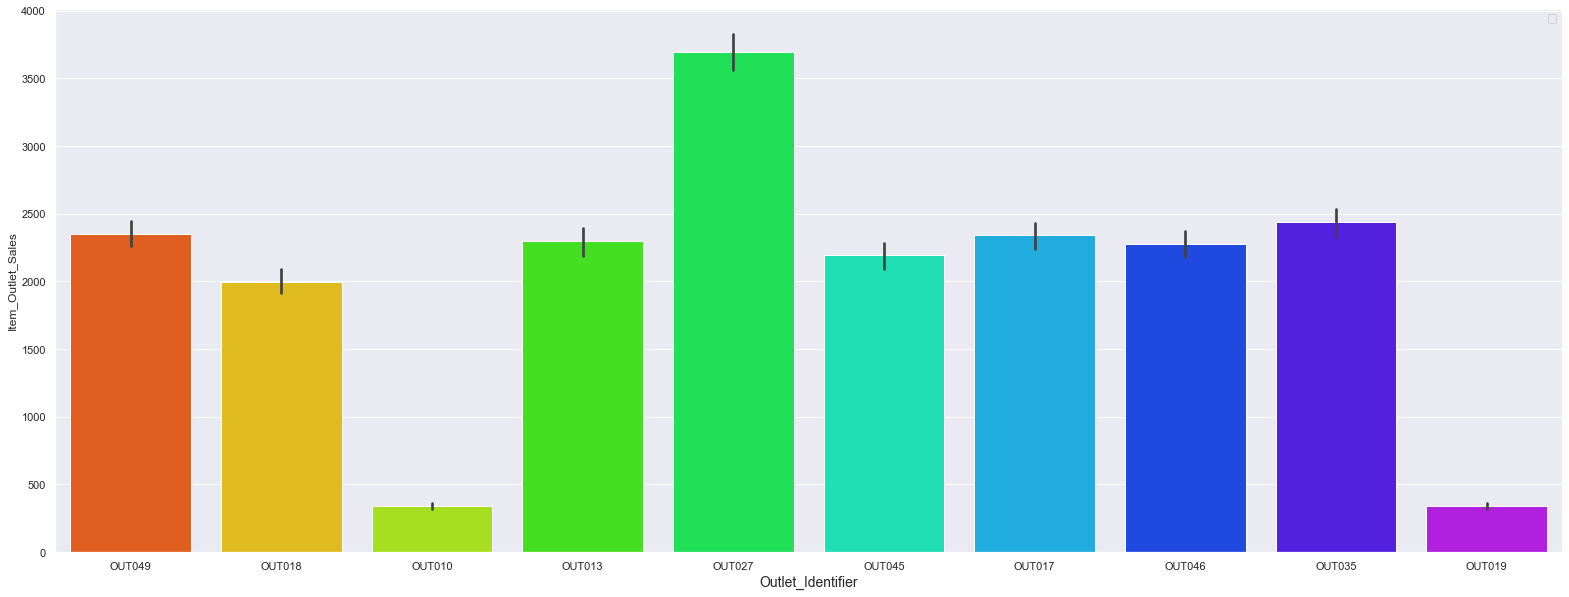

In [167]:
plt.figure(figsize=(27,10))
sns.barplot(x='Outlet_Identifier' ,y='Item_Outlet_Sales', data=tr_set ,palette='gist_rainbow')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


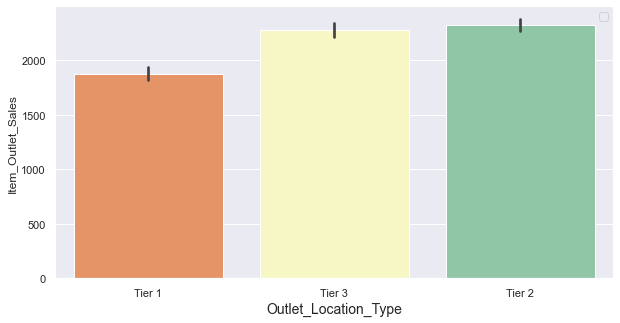

In [170]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Location_Type' ,y='Item_Outlet_Sales', data=tr_set ,palette='Spectral')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


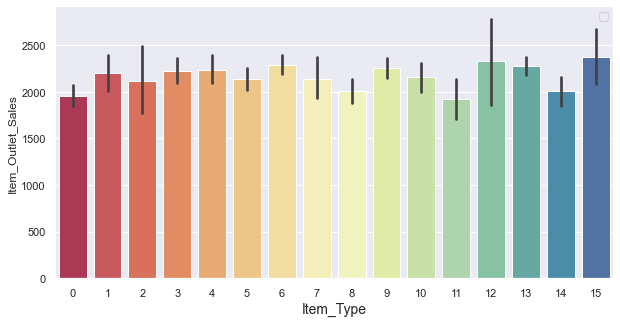

In [248]:
plt.figure(figsize=(10,5))
sns.barplot(x='Item_Type' ,y='Item_Outlet_Sales', data=tr_set ,palette='Spectral')
plt.xlabel('Item_Type', fontsize=14)
plt.legend()
plt.show()

## Categorical Features

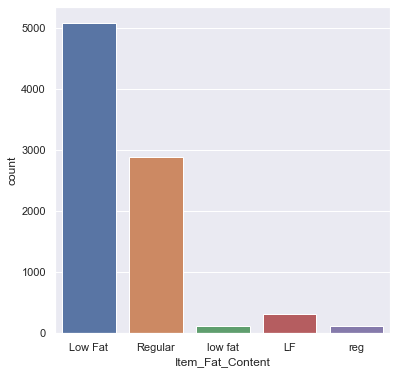

In [30]:
# Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content',data=big_mart_data)
plt.show()

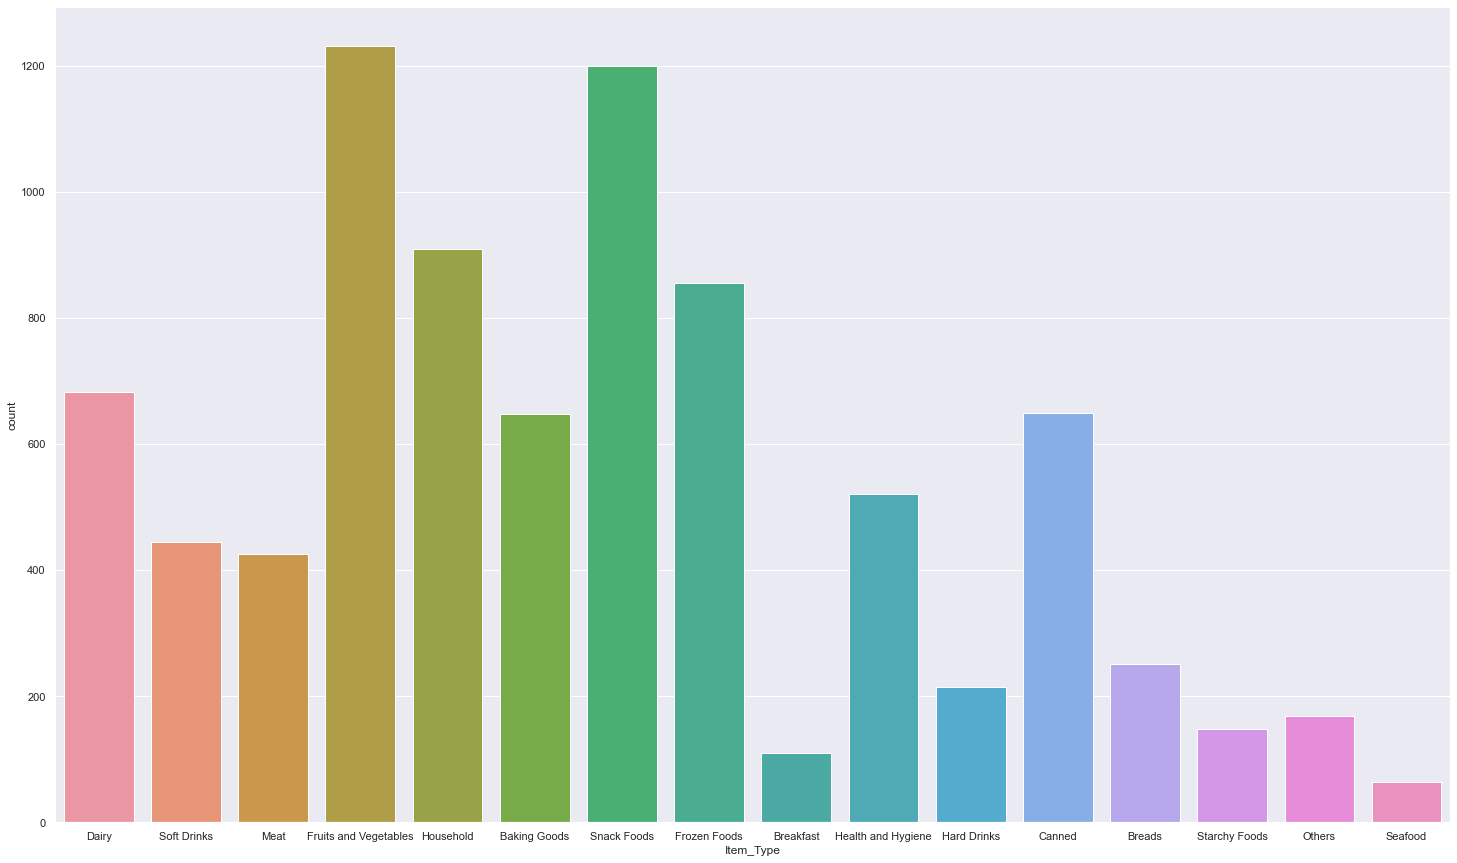

In [31]:
# Item_Type column
plt.figure(figsize=(25,15))
sns.countplot(x='Item_Type',data=big_mart_data)
plt.show()

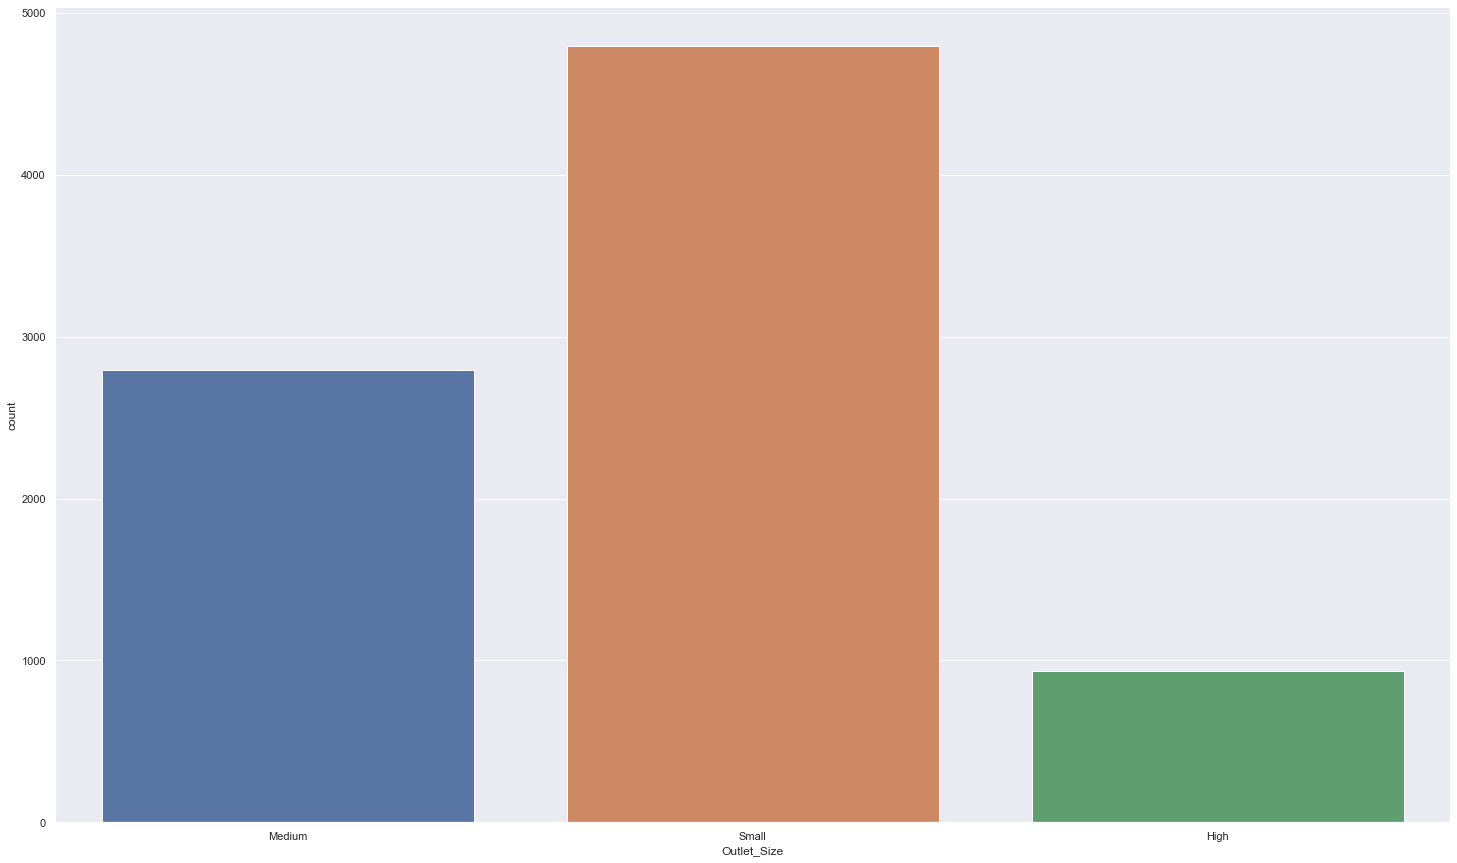

In [32]:
# Outlet_Size column
plt.figure(figsize=(25,15))
sns.countplot(x='Outlet_Size',data=big_mart_data)
plt.show()

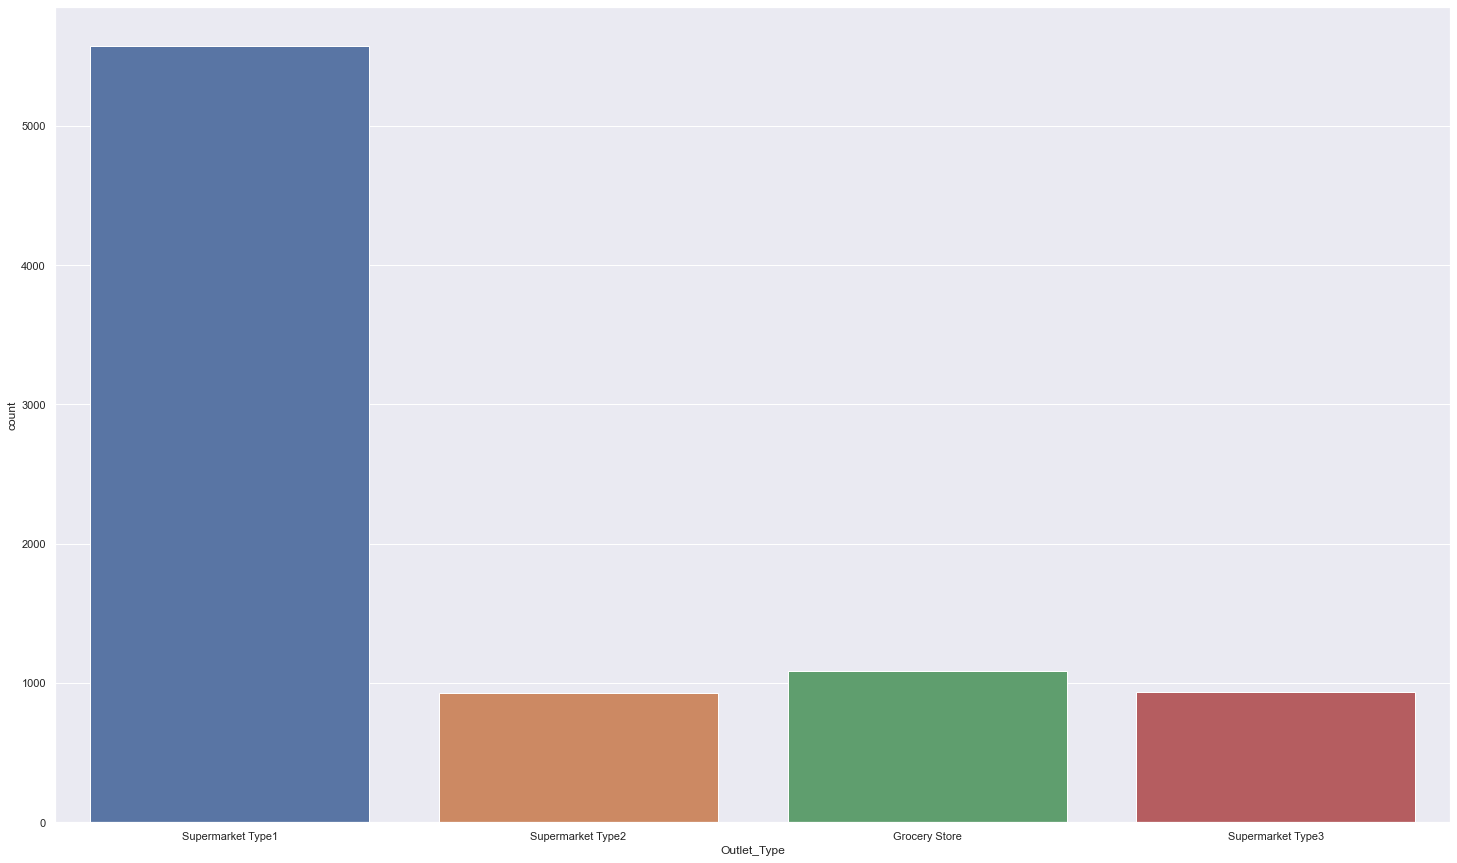

In [33]:
# Outlet_Type column
plt.figure(figsize=(25,15))
sns.countplot(x='Outlet_Type',data=big_mart_data)
plt.show()

## Data Pre-Processing

In [35]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [37]:
big_mart_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


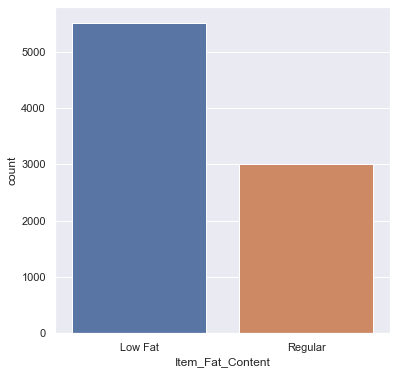

In [39]:
# Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content',data=big_mart_data)
plt.show()

## Correlation Matrix

C:\Users\vibgyors computer\AppData\Local\Temp\ipykernel_20384\202727040.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(tr_set.corr())


<Axes: >

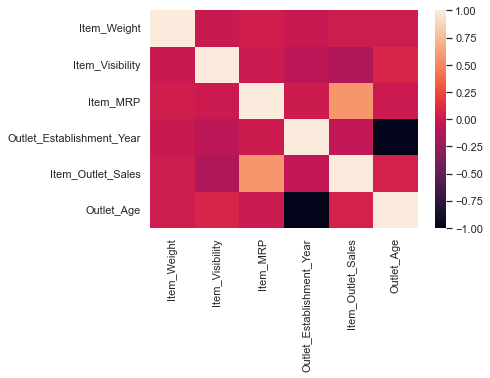

In [171]:
sns.heatmap(tr_set.corr())

Item_Outlet_Sales is highly correlated with Item_MRP

The columns Outlet_Establishment_Year, Item_Identifier and Outlet_Identifier don't have significant values so we will drop them

In [184]:
tr_set  = tr_set.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)
te_set = te_set.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [186]:
tr_set.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,9.30,0,0.016047,4,249.8092,1,0,1,3735.1380,14
1,5.92,1,0.019278,14,48.2692,1,2,2,443.4228,4
2,17.50,0,0.016760,10,141.6180,1,0,1,2097.2700,14
3,19.20,1,0.000000,6,182.0950,2,2,0,732.3800,15
4,8.93,0,0.000000,9,53.8614,0,2,1,994.7052,26


## Label Encoding

In [177]:
encoder=LabelEncoder()

In [188]:
tr_set['Item_Fat_Content']= encoder.fit_transform(tr_set.Item_Fat_Content)
tr_set['Item_Type']  = encoder.fit_transform(tr_set['Item_Type'])
tr_set['Outlet_Size']= encoder.fit_transform(tr_set['Outlet_Size'])
tr_set['Outlet_Location_Type']= encoder.fit_transform(tr_set['Outlet_Location_Type'])
tr_set['Outlet_Type']= encoder.fit_transform(tr_set['Outlet_Type'])



In [189]:
te_set['Item_Fat_Content']= encoder.fit_transform(te_set.Item_Fat_Content)
te_set['Item_Type']  = encoder.fit_transform(te_set['Item_Type'])
te_set['Outlet_Size']= encoder.fit_transform(te_set['Outlet_Size'])
te_set['Outlet_Location_Type']= encoder.fit_transform(te_set['Outlet_Location_Type'])
te_set['Outlet_Type']= encoder.fit_transform(te_set['Outlet_Type'])



In [190]:
tr_set.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,9.30,0,0.016047,4,249.8092,1,0,1,3735.1380,14
1,5.92,1,0.019278,14,48.2692,1,2,2,443.4228,4
2,17.50,0,0.016760,10,141.6180,1,0,1,2097.2700,14
3,19.20,1,0.000000,6,182.0950,2,2,0,732.3800,15
4,8.93,0,0.000000,9,53.8614,0,2,1,994.7052,26


## Machine Learning Models

### Splitting features and Target

In [192]:
x =tr_set.drop(columns='Item_Outlet_Sales', axis=1)
y = tr_set['Item_Outlet_Sales']

### Splitting the data into Training data and Testing Data

In [194]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [48]:
x.shape,x_train.shape,x_test.shape

((8523, 11), (6818, 11), (1705, 11))

In [195]:
y.shape,y_train.shape,y_test.shape

((8523,), (6818,), (1705,))

## Linear Regression

In [207]:
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)
y_predict = reg.predict(x_test)

LR_MAE = round(MAE(y_test, y_predict),2)
LR_MSE = round(MSE(y_test, y_predict),2)
LR_R_2 = round(R2(y_test, y_predict),4)

print(f" Mean Absolute Error: {LR_MAE}\n")
print(f" Mean Squared Error: {LR_MSE}\n")
print(f" R^2 Score: {LR_R_2}\n")


 Mean Absolute Error: 915.99

 Mean Squared Error: 1446767.66

 R^2 Score: 0.5057



In [210]:
Linear_Regression=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Linear_Regression.to_csv(r"C:\Users\vibgyors computer\OneDrive\Desktop\Project\Technocolabs\Big Mart Sales\Linear_Regression.csv", index=False)     

## Random Forest Regressor

In [213]:
RFR= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=101)
RFR.fit(x_train, y_train)
y_predict = RFR.predict(x_test)

RFR_MAE = round(MAE(y_test, y_predict),2)
RFR_MSE = round(MSE(y_test, y_predict),2)
RFR_R_2 = round(R2(y_test, y_predict),4)

print(f" Mean Absolute Error: {RFR_MAE}\n")
print(f" Mean Squared Error: {RFR_MSE}\n")
print(f" R^2 Score: {RFR_R_2}\n")

 Mean Absolute Error: 778.57

 Mean Squared Error: 1202141.21

 R^2 Score: 0.5893



In [224]:
Random_Forest_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Random_Forest_Regressor.to_csv(r"C:\Users\vibgyors computer\OneDrive\Desktop\Project\Technocolabs\Big Mart Sales\Random Forest Regressor.csv") 

## Lasso Regressor

In [219]:
LS = Lasso(alpha = 0.05)
LS.fit(x_train,y_train)
y_predict = LS.predict(x_test)

LS_MAE = round(MAE(y_test, y_predict),2)
LS_MSE = round(MSE(y_test, y_predict),2)
LS_R_2 = round(R2(y_test, y_predict),4)


print(f" Mean Absolute Error: {LS_MAE}\n")
print(f" Mean Squared Error: {LS_MSE}\n")
print(f" R^2 Score: {LS_R_2}\n")

 Mean Absolute Error: 915.98

 Mean Squared Error: 1446768.48

 R^2 Score: 0.5057



In [225]:
Lasso_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Lasso_Regressor.to_csv(r"C:\Users\vibgyors computer\OneDrive\Desktop\Project\Technocolabs\Big Mart Sales\Lasso Regressor.csv")   

## Linear Regressor

In [236]:
regressor = XGBRegressor()
regressor.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

### Evaluation

In [240]:
#prediction on training data
training_data_prediction = regressor.predict(x_test)
# R squared Value
r2_train = metrics.r2_score(y_test,training_data_prediction)
r2_train


0.5087933284742086